In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [56]:
ruta = r"C:\Users\Soporte\Desktop\analizador_bajas\data\BASEFUGA_GENERAL.csv"

df = pd.read_csv(ruta)

print("--- INFO DATASET ---")
print(df.info())
print("--- Primeros 5 registros ---")
print(df.head())

--- INFO DATASET ---
<class 'pandas.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   int64  
 1   GENERO        2283 non-null   str    
 2   RENTA         2294 non-null   int64  
 3   EDAD          2292 non-null   float64
 4   NIV_EDUC      2283 non-null   str    
 5   E_CIVIL       2283 non-null   str    
 6   COD_OFI       2294 non-null   int64  
 7   COD_COM       2291 non-null   float64
 8   CIUDAD        2291 non-null   str    
 9   D_Marzo       2294 non-null   int64  
 10  D_Abril       2294 non-null   int64  
 11  D_Mayo        2294 non-null   int64  
 12  D_Junio       2294 non-null   int64  
 13  D_Julio       2294 non-null   int64  
 14  D_Agosto      2294 non-null   int64  
 15  D_Septiembre  2294 non-null   int64  
 16  M_MOROSO      2294 non-null   int64  
 17  MONTO         2294 non-null   int64  
 18  SEGURO        2294

In [57]:
X = df.drop(columns=['ID','FUGA'])
y = df['FUGA']

In [58]:
X = pd.get_dummies(X, columns=['GENERO','NIV_EDUC','E_CIVIL','CIUDAD','SEGURO'])
y =y.map({'NO FUGA':0, 'FUGA':1})

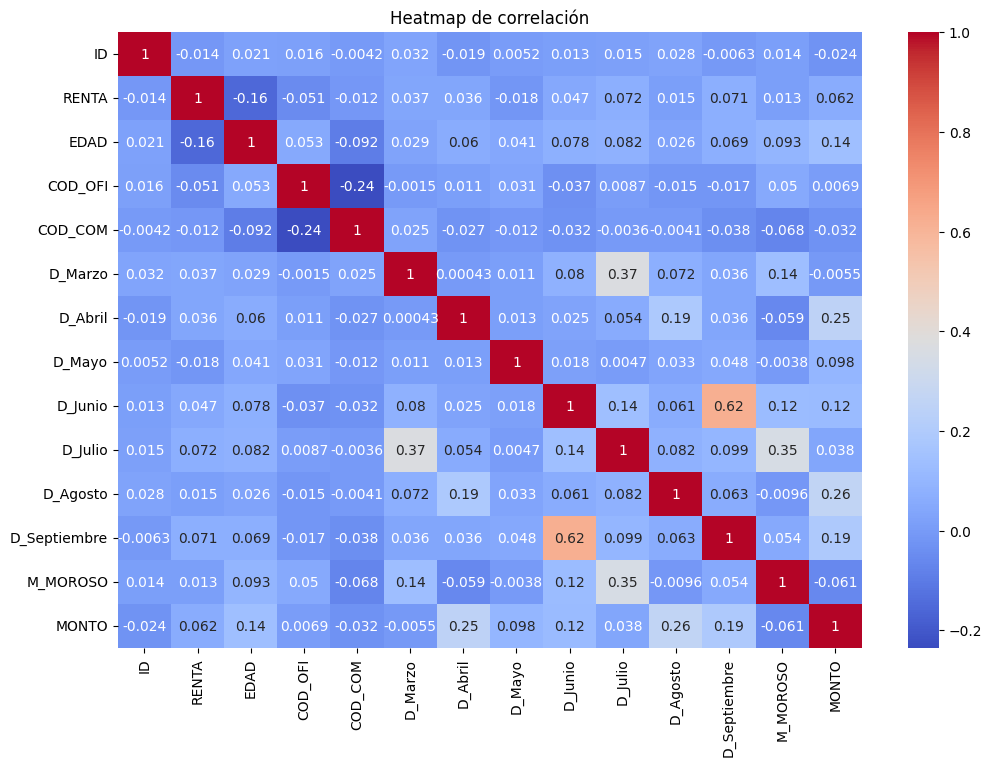

In [59]:
numericas = df.select_dtypes(include=["int64", "float64"])
corr = numericas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap de correlación")
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
matriz_de_confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Matriz de confurion:", matriz_de_confusion)
print("Reporte:", report)


Accuracy: 0.9368191721132898
Matriz de confurion: [[224  12]
 [ 17 206]]
Reporte:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       236
           1       0.94      0.92      0.93       223

    accuracy                           0.94       459
   macro avg       0.94      0.94      0.94       459
weighted avg       0.94      0.94      0.94       459



In [63]:
nuevo_cliente = {
    "GENERO": "M",
    "RENTA": 500000,
    "EDAD": 40,
    "NIV_EDUC": "TEC",
    "E_CIVIL": "VIU",
    "COD_OFI": 45,
    "COD_COM": 80,
    "CIUDAD": "SANTIAGO",
    "D_Marzo": 0,
    "D_Abril": 50000,
    "D_Mayo": 0,
    "D_Junio": 100000,
    "D_Julio": 0,
    "D_Agosto": 2000,
    "D_Septiembre": 0,
    "M_MOROSO": 1,
    "MONTO": 200000,
    "SEGURO": "SI"
}


In [64]:
nuevo_cliente_df = pd.DataFrame([nuevo_cliente])
nuevo_cliente_df = pd.get_dummies(
    nuevo_cliente_df, columns=["GENERO", "NIV_EDUC", "E_CIVIL", "CIUDAD","SEGURO"]
)

# Asegurarte de que todas las columnas del entrenamiento estén presentes
for col in X_train.columns:
    if col not in nuevo_cliente_df.columns:
        nuevo_cliente_df[col] = 0

# Reordenar columnas
nuevo_cliente_df = nuevo_cliente_df[X_train.columns]


In [65]:
prediccion = modelo.predict(nuevo_cliente_df)
proba = modelo.predict_proba(nuevo_cliente_df)

print("Predicción (0 = NO FUGA, 1 = FUGA):", prediccion[0])
print("Probabilidades de NO FUGA / FUGA:", proba[0])


Predicción (0 = NO FUGA, 1 = FUGA): 0
Probabilidades de NO FUGA / FUGA: [0.59 0.41]


In [67]:
joblib.dump(modelo, "modelo_fuga.pkl")
modelo = joblib.load("modelo_fuga.pkl")